# pond_highlights_20250802

Notebook looking at pond data for general meeting on Aug. 2

@author: David Clemens-Sewall

In [1]:
# Imports
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import transforms

%matplotlib inline

In [2]:
# Read in a1 data
data_path = os.path.join('..', 'data', 'whoi_l_arm_transmittance')

project_names = ['20250710-r1-ocn_pond',
                 '20250716-r2-NEpond',
                 '20250716-r2-Spond',
                 '20250716-r2-SNpond',
                 '20250716-r2-CKNpond',
                 '20250727-r1-sharedpondeast',
                 '20250727-r1-sharedpondmiddle',
                 '20250727-r1-sharedpondwest',
                 '20250730-r2-NEpond',
                 '20250730-r2-Spond',
                 #'20250730-r2-SNpond',
                 #'20250730-r2-CKNpond',
                 ]

ls_df_a1 = []
for project_name in project_names:
    file_path = os.path.join(data_path,
                            project_name,
                            'contrasts_l_arm_' + project_name + '.a1.h5')
    ls_df_a1.append(pd.read_hdf(file_path))

df_a1 = pd.concat(ls_df_a1)

In [3]:
df_a1

value
timestamp_utc             station location azimuth type depth repetition wavelength_nm variable                       
2025-07-10 15:16:33+00:00 1       ocn_pond 90      T    NaN   5          306.306837    Incident_mW/(m^2_nm)        NaN
                                                                         309.632786    Incident_mW/(m^2_nm)        NaN
                                                                         312.959405    Incident_mW/(m^2_nm)        NaN
                                                                         316.286683    Incident_mW/(m^2_nm)        NaN
                                                                         319.614609    Incident_mW/(m^2_nm)  53.840614
...                                                                                                                ...
2025-07-30 15:35:07+00:00 2       Spond    180     T    NaN   7          936.666667    Transmittance_Status   0.000000
                                                                         940.000000    Transmittance_Status   0.000000
                                                                         943.333333    Transmittance_Status   0.000000
                                                                         946.666667    Transmittance_Status   0.000000
                                                                         950.000000    Transmittance_Status   0.000000

[754116 rows x 1 columns]

In [4]:
df_temp = df_a1.query('variable == "Transmittance"').reset_index()
df_temp['date'] = df_temp['timestamp_utc'].dt.strftime('%Y-%m-%d')
df_temp

,timestamp_utc,station,location,azimuth,type,depth,repetition,wavelength_nm,variable,value,date
0,2025-07-10 15:16:33+00:00,1,ocn_pond,90,T,NaN,5,320.000000,Transmittance,0.416830,2025-07-10
1,2025-07-10 15:16:33+00:00,1,ocn_pond,90,T,NaN,5,323.333333,Transmittance,0.427771,2025-07-10
2,2025-07-10 15:16:33+00:00,1,ocn_pond,90,T,NaN,5,326.666667,Transmittance,0.429285,2025-07-10
3,2025-07-10 15:16:33+00:00,1,ocn_pond,90,T,NaN,5,330.000000,Transmittance,0.439209,2025-07-10
4,2025-07-10 15:16:33+00:00,1,ocn_pond,90,T,NaN,5,333.333333,Transmittance,0.449681,2025-07-10
...,...,...,...,...,...,...,...,...,...,...,...
64595,2025-07-30 15:35:07+00:00,2,Spond,180,T,NaN,7,936.666667,Transmittance,0.053443,2025-07-30
64596,2025-07-30 15:35:07+00:00,2,Spond,180,T,NaN,7,940.000000,Transmittance,0.054967,2025-07-30
64597,2025-07-30 15:35:07+00:00,2,Spond,180,T,NaN,7,943.333333,Transmittance,0.040752,2025-07-30
64598,2025-07-30 15:35:07+00:00,2,Spond,180,T,NaN,7,946.666667,Transmittance,0.041621,2025-07-30


<Axes: xlabel='wavelength_nm', ylabel='value'>

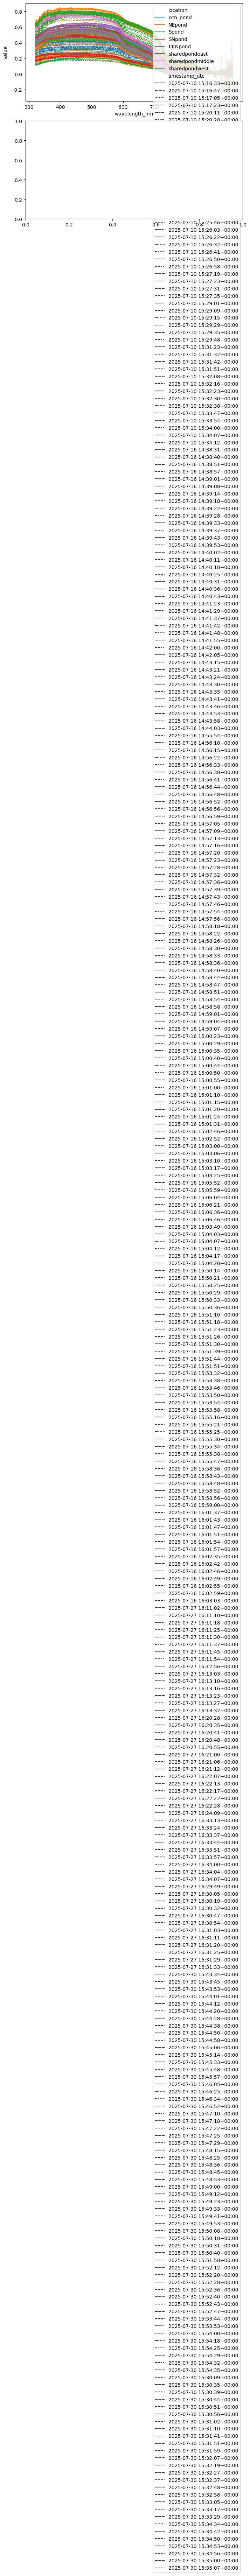

In [5]:
f, axs = plt.subplots(2, 1, figsize=(8,8))

sns.lineplot(x='wavelength_nm',y='value', hue='location', style='timestamp_utc',
            data=df_a1.query('variable == "Transmittance" & type=="T"'), ax=axs[0])

<Axes: xlabel='wavelength_nm', ylabel='value'>

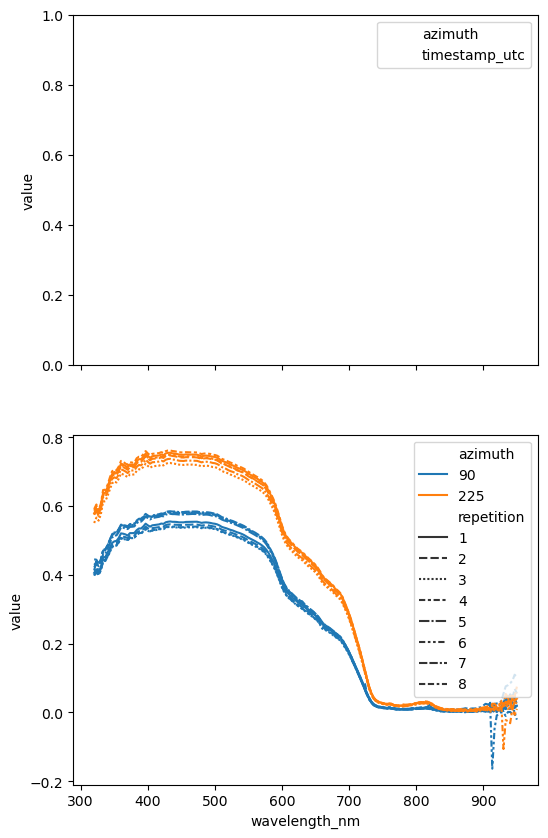

In [6]:
# Look at just ponds where we have cores
# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

location = 'sharedpondmiddle'
T_az = '90'

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T" & location==@location'),
            ax=axs[1])
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='timestamp_utc', 
             data=df_a1.query('variable=="Albedo" & type=="A" & location==@location'),
            ax=axs[0])

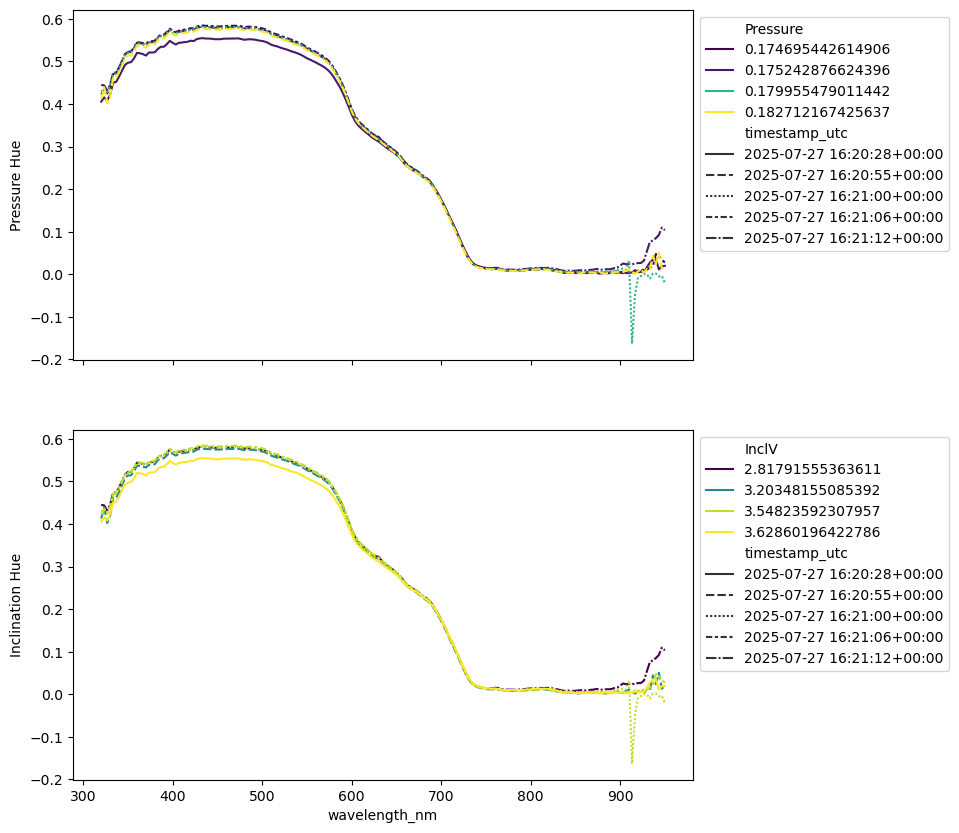

In [7]:
location = 'sharedpondmiddle'
T_az = '90'

# Need to select single(/averaged?) transmittance and albedo spectra for each site
df_temp_1 = df_a1.query('location == @location & type == "T" & variable == "Transmittance"')
df_temp_2 = df_a1.query('location == @location & type == "T" & variable in ["InclV", "Pressure"]')

df_temp_2 = df_temp_2.reset_index().drop(columns=['station', 'location', 'azimuth', 'type', 'depth', 'repetition', 'wavelength_nm'])
df_temp_2 = df_temp_2.pivot(index='timestamp_utc', columns='variable', values='value').reset_index()

df_temp = df_temp_1.reset_index().merge(df_temp_2, left_on='timestamp_utc', right_on='timestamp_utc')

pressure_quant_thresh = 1.0
pressure_thresh = df_temp_2['Pressure'].quantile(pressure_quant_thresh)

incl_thresh = 5

f, axs = plt.subplots(2, 1, sharex=True, figsize=(8,10))

sns.lineplot(x='wavelength_nm', y='value', hue='Pressure', style='timestamp_utc',#'InclV', 
             data=df_temp.query('Pressure <= @pressure_thresh & InclV <= @incl_thresh & azimuth==@T_az'),
             palette='viridis', ax=axs[0])
axs[0].set_ylabel('Pressure Hue')
sns.move_legend(axs[0], "upper left", bbox_to_anchor=(1,1))

sns.lineplot(x='wavelength_nm', y='value', hue='InclV', style='timestamp_utc',#'InclV', 
             data=df_temp.query('Pressure <= @pressure_thresh & InclV <= @incl_thresh & azimuth==@T_az'),
             palette='viridis', ax=axs[1])
axs[1].set_ylabel('Inclination Hue')
sns.move_legend(axs[1], "upper left", bbox_to_anchor=(1,1))

#plt.ylim([0, 0.2])

In [8]:
# select the lowest presure one in the very low inclination group
ts_shared = '2025-07-27 16:20:55+00:00'

<Axes: xlabel='wavelength_nm', ylabel='value'>

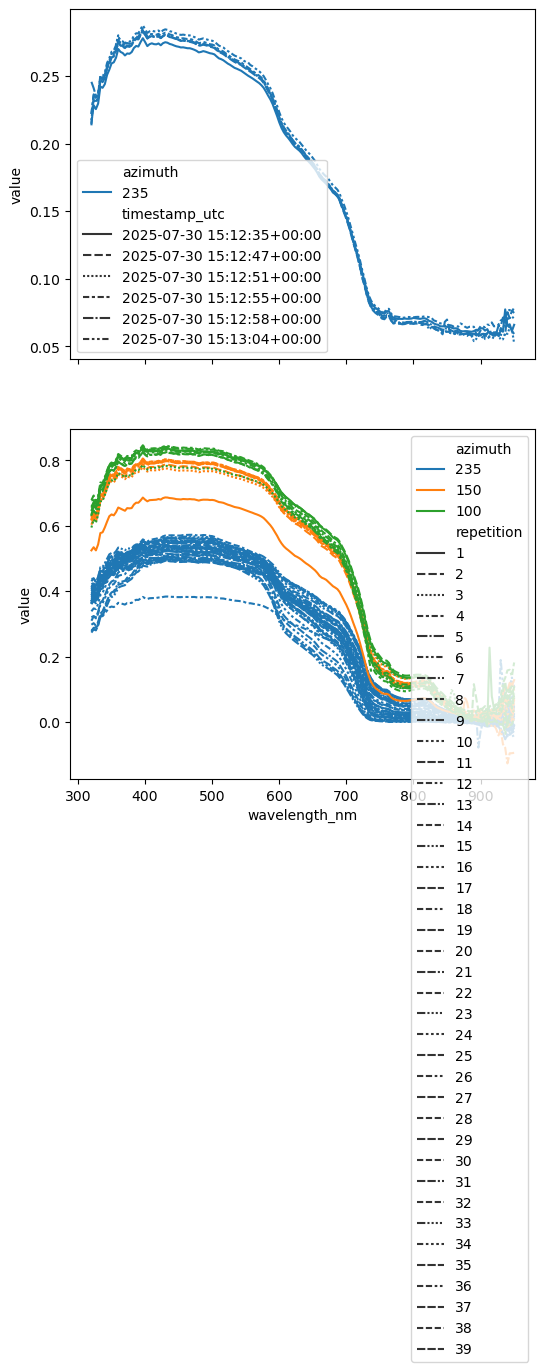

In [9]:
# Look at just ponds where we have cores
# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

dt_str = '2025-07-30'
location = 'NEpond'

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.xs(dt_str, level='timestamp_utc').query('variable=="Transmittance" & type=="T" & location==@location'),
            ax=axs[1])
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='timestamp_utc', 
             data=df_a1.xs(dt_str, level='timestamp_utc').query('variable=="Albedo" & type=="A" & location==@location'),
            ax=axs[0])

In [10]:
ts_NE_2_A = '2025-07-30 15:12:47+00:00'

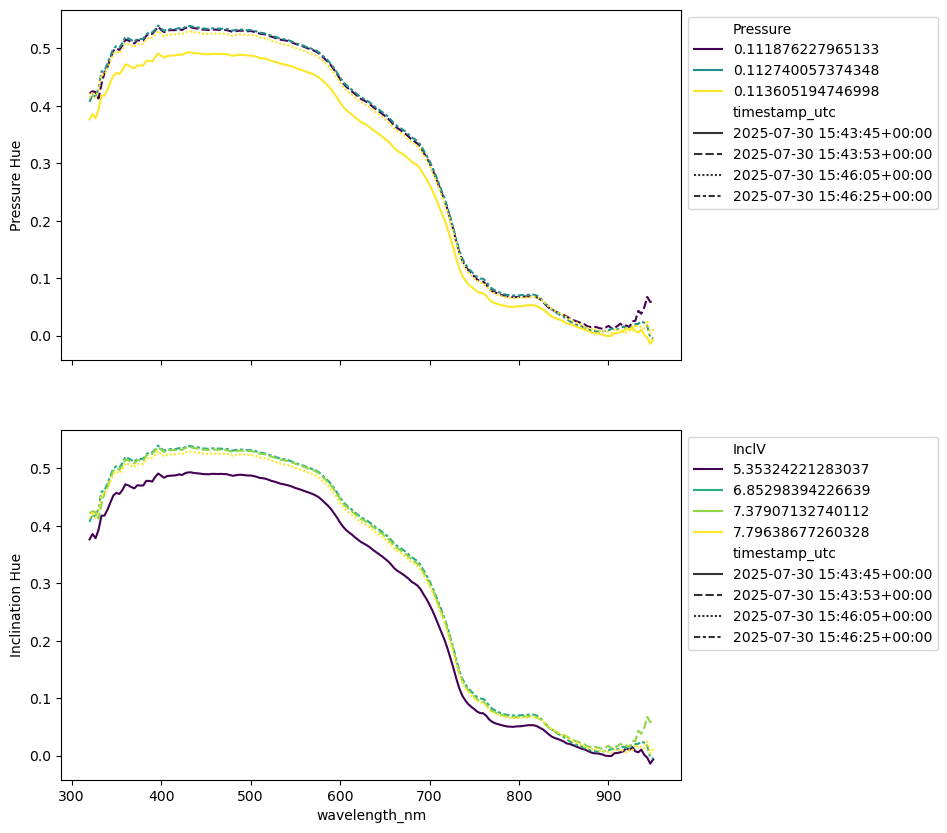

In [11]:
location = 'NEpond'
T_az = '235'
dt_str = '2025-07-30'

# Need to select single(/averaged?) transmittance and albedo spectra for each site
df_temp_1 = df_a1.xs(dt_str, level='timestamp_utc').query('location == @location & type == "T" & variable == "Transmittance"')
df_temp_2 = df_a1.xs(dt_str, level='timestamp_utc').query('location == @location & type == "T" & variable in ["InclV", "Pressure"]')

df_temp_2 = df_temp_2.reset_index().drop(columns=['station', 'location', 'azimuth', 'type', 'depth', 'repetition', 'wavelength_nm'])
df_temp_2 = df_temp_2.pivot(index='timestamp_utc', columns='variable', values='value').reset_index()

df_temp = df_temp_1.reset_index().merge(df_temp_2, left_on='timestamp_utc', right_on='timestamp_utc')

pressure_quant_thresh = 0.25
pressure_thresh = df_temp_2['Pressure'].quantile(pressure_quant_thresh)

incl_thresh = 10

f, axs = plt.subplots(2, 1, sharex=True, figsize=(8,10))

sns.lineplot(x='wavelength_nm', y='value', hue='Pressure', style='timestamp_utc',#'InclV', 
             data=df_temp.query('Pressure <= @pressure_thresh & InclV <= @incl_thresh & azimuth == @T_az'),
             palette='viridis', ax=axs[0])
axs[0].set_ylabel('Pressure Hue')
sns.move_legend(axs[0], "upper left", bbox_to_anchor=(1,1))

sns.lineplot(x='wavelength_nm', y='value', hue='InclV', style='timestamp_utc',#'InclV', 
             data=df_temp.query('Pressure <= @pressure_thresh & InclV <= @incl_thresh & azimuth == @T_az'),
             palette='viridis', ax=axs[1])
axs[1].set_ylabel('Inclination Hue')
sns.move_legend(axs[1], "upper left", bbox_to_anchor=(1,1))

In [12]:
ts_NE = '2025-07-30 15:43:53+00:00'

<Axes: xlabel='wavelength_nm', ylabel='value'>

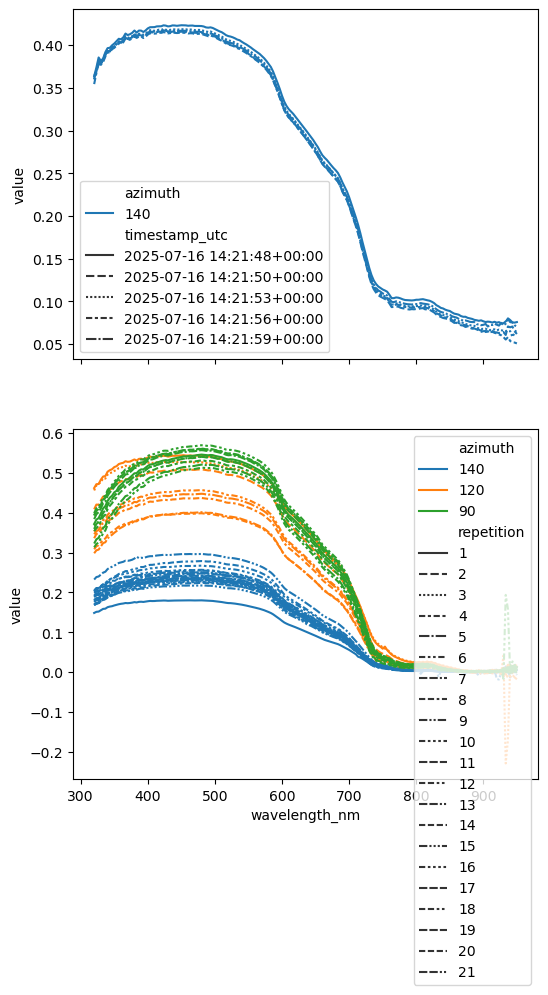

In [13]:
# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

dt_str = '2025-07-16'
location = 'NEpond'

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.xs(dt_str, level='timestamp_utc').query('variable=="Transmittance" & type=="T" & location==@location'),
            ax=axs[1])
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='timestamp_utc', 
             data=df_a1.xs(dt_str, level='timestamp_utc').query('variable=="Albedo" & type=="A" & location==@location'),
            ax=axs[0])

In [14]:
ts_NE_1_A = '2025-07-16 14:21:50+00:00'

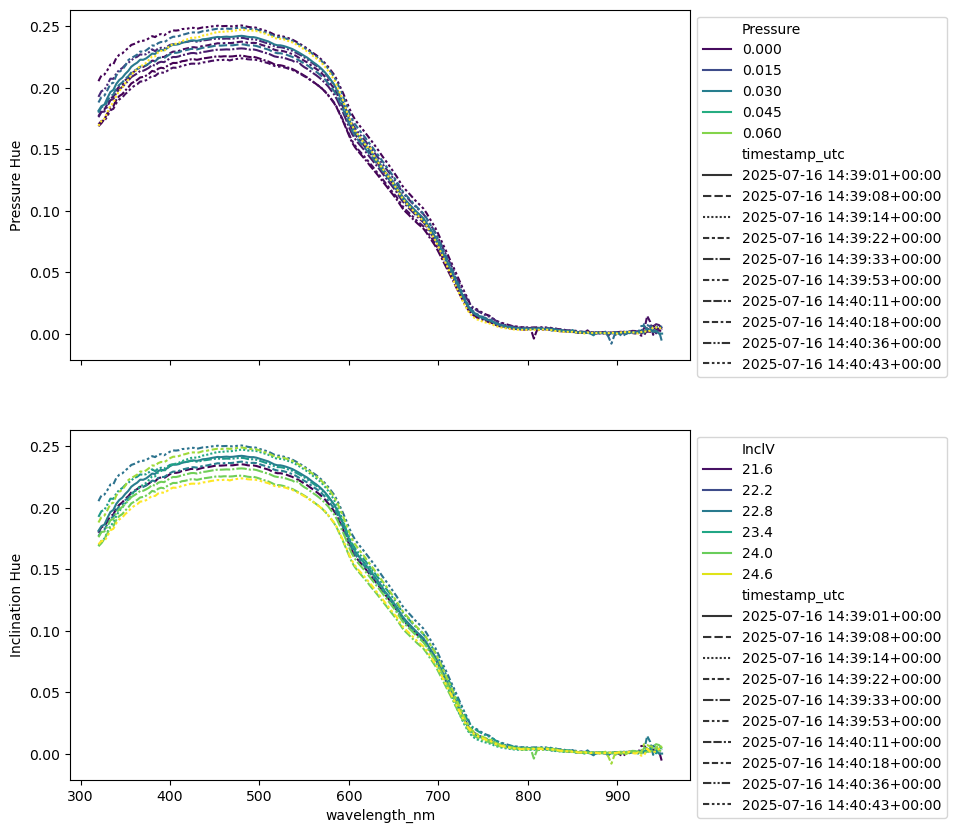

In [15]:
location = 'NEpond'
T_az = '140'
dt_str = '2025-07-16'

# Need to select single(/averaged?) transmittance and albedo spectra for each site
df_temp_1 = df_a1.xs(dt_str, level='timestamp_utc').query('location == @location & type == "T" & variable == "Transmittance"')
df_temp_2 = df_a1.xs(dt_str, level='timestamp_utc').query('location == @location & type == "T" & variable in ["InclV", "Pressure"]')

df_temp_2 = df_temp_2.reset_index().drop(columns=['station', 'location', 'azimuth', 'type', 'depth', 'repetition', 'wavelength_nm'])
df_temp_2 = df_temp_2.pivot(index='timestamp_utc', columns='variable', values='value').reset_index()

df_temp = df_temp_1.reset_index().merge(df_temp_2, left_on='timestamp_utc', right_on='timestamp_utc')

pressure_quant_thresh = 1.0
pressure_thresh = df_temp_2['Pressure'].quantile(pressure_quant_thresh)

incl_thresh = 25

f, axs = plt.subplots(2, 1, sharex=True, figsize=(8,10))

sns.lineplot(x='wavelength_nm', y='value', hue='Pressure', style='timestamp_utc',#'InclV', 
             data=df_temp.query('Pressure <= @pressure_thresh & InclV <= @incl_thresh & azimuth == @T_az'),
             palette='viridis', ax=axs[0])
axs[0].set_ylabel('Pressure Hue')
sns.move_legend(axs[0], "upper left", bbox_to_anchor=(1,1))

sns.lineplot(x='wavelength_nm', y='value', hue='InclV', style='timestamp_utc',#'InclV', 
             data=df_temp.query('Pressure <= @pressure_thresh & InclV <= @incl_thresh & azimuth == @T_az'),
             palette='viridis', ax=axs[1])
axs[1].set_ylabel('Inclination Hue')
sns.move_legend(axs[1], "upper left", bbox_to_anchor=(1,1))

In [16]:
ts_NE_1 = '2025-07-16 14:39:08+00:00'

<Axes: xlabel='wavelength_nm', ylabel='value'>

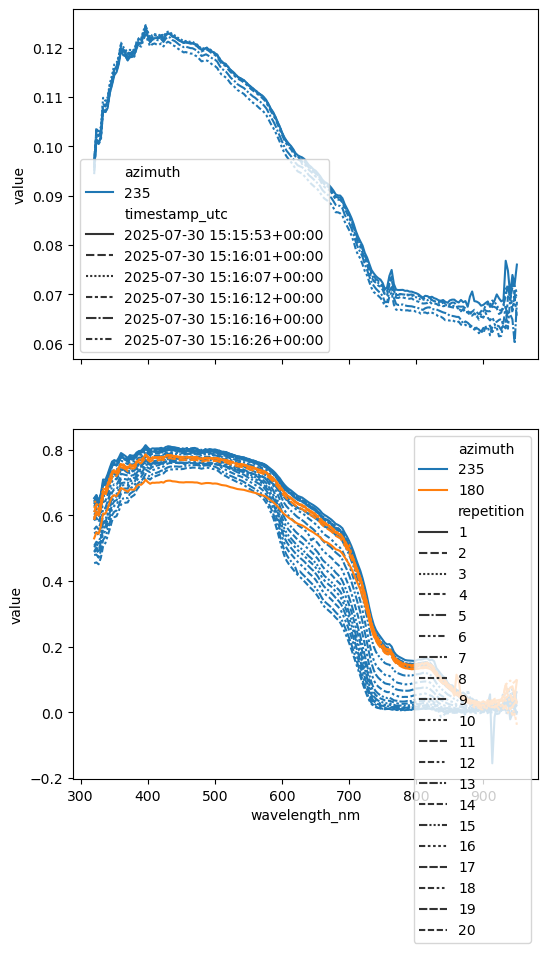

In [17]:
# Look at just ponds where we have cores
# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

dt_str = '2025-07-30'
location = 'Spond'

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.xs(dt_str, level='timestamp_utc').query('variable=="Transmittance" & type=="T" & location==@location'),
            ax=axs[1])
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='timestamp_utc', 
             data=df_a1.xs(dt_str, level='timestamp_utc').query('variable=="Albedo" & type=="A" & location==@location'),
            ax=axs[0])

In [18]:
ts_S_2_A = '2025-07-30 15:16:01+00:00'

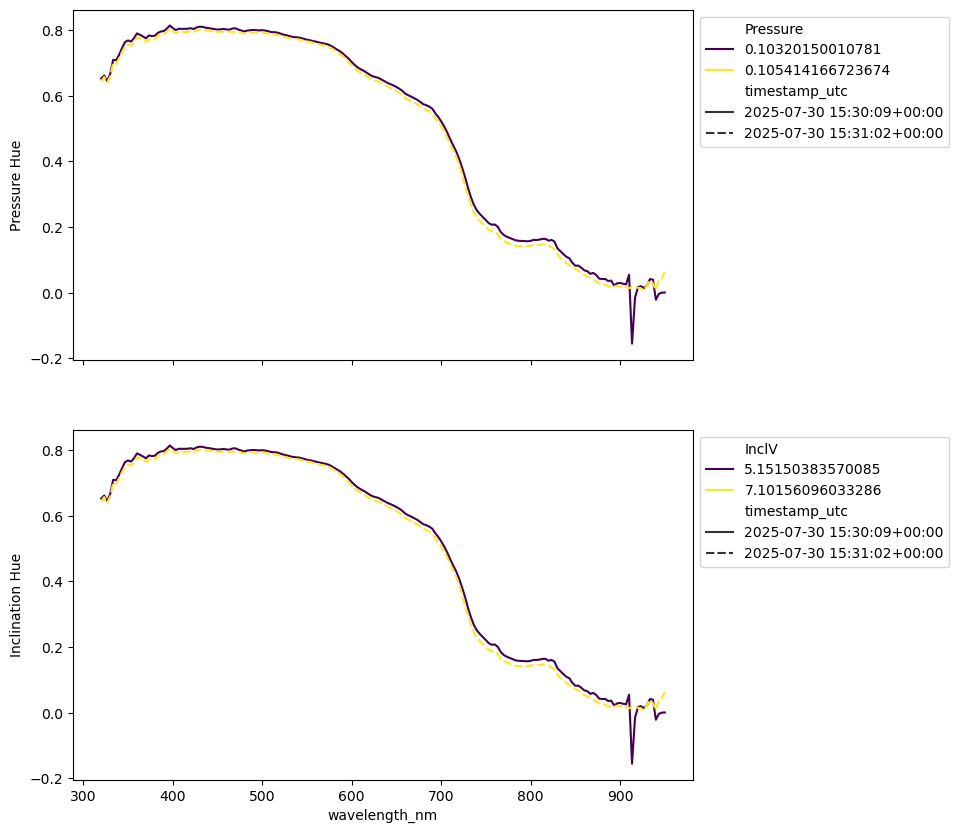

In [19]:
location = 'Spond'
T_az = '235'
dt_str = '2025-07-30'

# Need to select single(/averaged?) transmittance and albedo spectra for each site
df_temp_1 = df_a1.xs(dt_str, level='timestamp_utc').query('location == @location & type == "T" & variable == "Transmittance"')
df_temp_2 = df_a1.xs(dt_str, level='timestamp_utc').query('location == @location & type == "T" & variable in ["InclV", "Pressure"]')

df_temp_2 = df_temp_2.reset_index().drop(columns=['station', 'location', 'azimuth', 'type', 'depth', 'repetition', 'wavelength_nm'])
df_temp_2 = df_temp_2.pivot(index='timestamp_utc', columns='variable', values='value').reset_index()

df_temp = df_temp_1.reset_index().merge(df_temp_2, left_on='timestamp_utc', right_on='timestamp_utc')

pressure_quant_thresh = 0.2
pressure_thresh = df_temp_2['Pressure'].quantile(pressure_quant_thresh)

incl_thresh = 10

f, axs = plt.subplots(2, 1, sharex=True, figsize=(8,10))

sns.lineplot(x='wavelength_nm', y='value', hue='Pressure', style='timestamp_utc',#'InclV', 
             data=df_temp.query('Pressure <= @pressure_thresh & InclV <= @incl_thresh & azimuth == @T_az'),
             palette='viridis', ax=axs[0])
axs[0].set_ylabel('Pressure Hue')
sns.move_legend(axs[0], "upper left", bbox_to_anchor=(1,1))

sns.lineplot(x='wavelength_nm', y='value', hue='InclV', style='timestamp_utc',#'InclV', 
             data=df_temp.query('Pressure <= @pressure_thresh & InclV <= @incl_thresh & azimuth == @T_az'),
             palette='viridis', ax=axs[1])
axs[1].set_ylabel('Inclination Hue')
sns.move_legend(axs[1], "upper left", bbox_to_anchor=(1,1))

In [20]:
ts_S = '2025-07-30 15:30:09+00:00'

<Axes: xlabel='wavelength_nm', ylabel='value'>

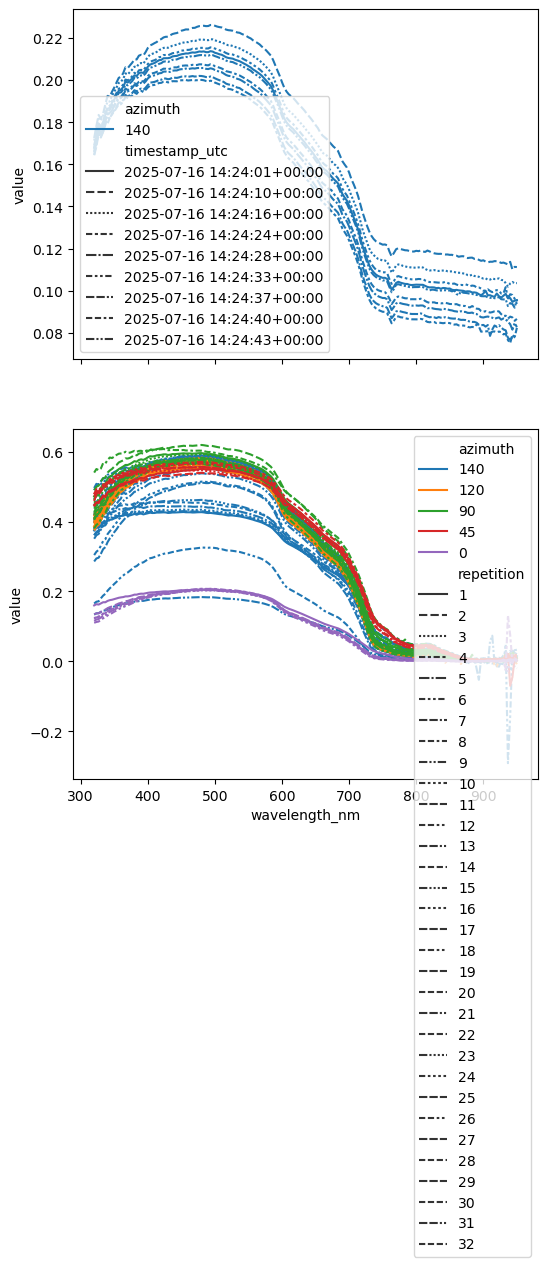

In [21]:
# Look at just ponds where we have cores
# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

dt_str = '2025-07-16'
location = 'Spond'

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.xs(dt_str, level='timestamp_utc').query('variable=="Transmittance" & type=="T" & location==@location'),
            ax=axs[1])
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='timestamp_utc', 
             data=df_a1.xs(dt_str, level='timestamp_utc').query('variable=="Albedo" & type=="A" & location==@location'),
            ax=axs[0])

In [22]:
ts_S_1_A = '2025-07-16 14:24:01+00:00'

In [23]:
df_a1.xs(dt_str, level='timestamp_utc').query('variable=="InclV" & type=="T" & location == "Spond"').groupby('azimuth').describe()

value                                                         \
        count       mean        std        min        25%        50%   
azimuth                                                                
0         6.0  14.190038   3.056081  12.495013  12.495013  12.817379   
120      15.0  19.995728   2.277168  16.936941  18.880201  19.567184   
140      32.0  33.105516  13.170234  12.495013  23.468016  30.076501   
45        7.0  11.830825   1.338807   9.537535  11.272673  12.629729   
90       13.0  14.260871   2.763104  10.284138  12.495013  13.811441   

                               
               75%        max  
azimuth                        
0        13.968601  20.270557  
120      20.995375  26.311454  
140      42.419221  73.541602  
45       12.683223  12.736716  
90       16.336085  19.567184

In [24]:
df_a1.xs(dt_str, level='timestamp_utc').query('variable=="Pressure" & type=="T" & location == "Spond"').groupby('azimuth').describe()

value                                                              \
        count      mean       std       min       25%       50%       75%   
azimuth                                                                     
0         6.0  0.061580  0.038725  0.008338  0.041242  0.055579  0.089484   
120      15.0  0.024771  0.041475 -0.004700 -0.001606  0.008053  0.022187   
140      32.0  0.030032  0.034319 -0.004414  0.005380  0.018754  0.037792   
45        7.0  0.018932  0.032955 -0.001880 -0.000121  0.010292  0.016517   
90       13.0  0.009385  0.010187 -0.004985 -0.001595  0.012812  0.017570   

                   
              max  
azimuth            
0        0.112735  
120      0.124631  
140      0.119873  
45       0.091323  
90       0.027086

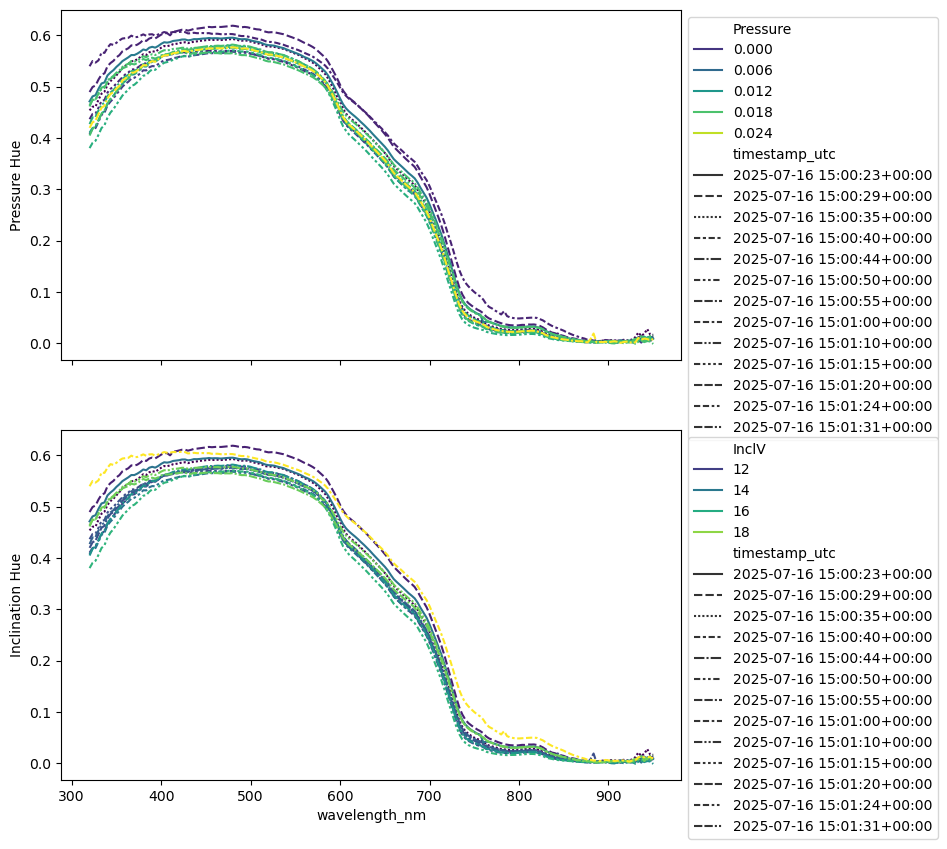

In [25]:
location = 'Spond'
T_az = '90'
dt_str = '2025-07-16'

# Need to select single(/averaged?) transmittance and albedo spectra for each site
df_temp_1 = df_a1.xs(dt_str, level='timestamp_utc').query('location == @location & type == "T" & variable == "Transmittance"')
df_temp_2 = df_a1.xs(dt_str, level='timestamp_utc').query('location == @location & type == "T" & variable in ["InclV", "Pressure"]')

df_temp_2 = df_temp_2.reset_index().drop(columns=['station', 'location', 'azimuth', 'type', 'depth', 'repetition', 'wavelength_nm'])
df_temp_2 = df_temp_2.pivot(index='timestamp_utc', columns='variable', values='value').reset_index()

df_temp = df_temp_1.reset_index().merge(df_temp_2, left_on='timestamp_utc', right_on='timestamp_utc')

pressure_quant_thresh = 1.0
pressure_thresh = df_temp_2['Pressure'].quantile(pressure_quant_thresh)

incl_thresh = 20

f, axs = plt.subplots(2, 1, sharex=True, figsize=(8,10))

sns.lineplot(x='wavelength_nm', y='value', hue='Pressure', style='timestamp_utc',#'InclV', 
             data=df_temp.query('Pressure <= @pressure_thresh & InclV <= @incl_thresh & azimuth == @T_az'),
             palette='viridis', ax=axs[0])
axs[0].set_ylabel('Pressure Hue')
sns.move_legend(axs[0], "upper left", bbox_to_anchor=(1,1))

sns.lineplot(x='wavelength_nm', y='value', hue='InclV', style='timestamp_utc',#'InclV', 
             data=df_temp.query('Pressure <= @pressure_thresh & InclV <= @incl_thresh & azimuth == @T_az'),
             palette='viridis', ax=axs[1])
axs[1].set_ylabel('Inclination Hue')
sns.move_legend(axs[1], "upper left", bbox_to_anchor=(1,1))

In [26]:
ts_S_1 = '2025-07-16 15:00:29+00:00'

In [27]:
## Density data from Dima
df_shared = pd.DataFrame({'depth': [0.03, 0.08, 0.13, 0.18, 0.23, 0.28, 0.33, 0.38, 0.41, 0.45],
                          'density': [0.887701463, 0.891840675, 0.8862866, 0.871442433, 0.85703557,
                                      0.852846261, 0.866868774, 0.883019176, 0.889191176, 0.873694799]})
df_shared['location'] = 'sharedpondmiddle'

df_NE = pd.DataFrame({'depth': [0.03, 0.09, 0.15, 0.21, 0.27, 0.33],
                      'density': [0.867030816, 0.877001093, 0.889802248, 0.870828367, 0.901709451, 0.908146]})
df_NE['location'] = 'NEpond'

df_S = pd.DataFrame({'depth': [0.03, 0.08, 0.13, 0.18, 0.23, 0.29],
                     'density': [0.841298491, 0.854274526, 0.891732786, 0.910703654, 0.9045097, 0.914014075]})
df_S['location'] = 'Spond'

df_dens = pd.concat([df_NE, df_S, df_shared])

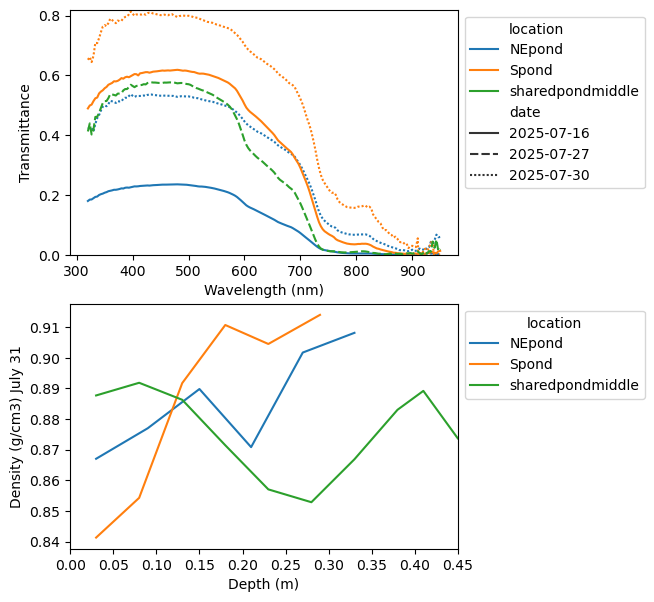

In [28]:
ts_sel = [ts_shared, ts_NE, ts_S, ts_NE_1, ts_S_1]
df_temp = df_a1.query('variable == "Transmittance" & timestamp_utc in @ts_sel').reset_index()
df_temp['date'] = df_temp['timestamp_utc'].dt.strftime('%Y-%m-%d')

f, axs = plt.subplots(2, 1, figsize=(5, 7))

sns.lineplot(x='wavelength_nm', y='value', hue='location', style='date', ax=axs[0],
            data=df_temp)
axs[0].set_ylabel('Transmittance')
axs[0].set_ylim([0, 0.82])
sns.move_legend(axs[0], "upper left", bbox_to_anchor=(1,1))
axs[0].set_xlabel('Wavelength (nm)')

sns.lineplot(x='depth', y='density', hue='location', ax=axs[1], data=df_dens)
axs[1].set_xlabel('Depth (m)')
axs[1].set_xlim([0, 0.45])
axs[1].set_ylabel('Density (g/cm3) July 31')
sns.move_legend(axs[1], "upper left", bbox_to_anchor=(1,1))

f.savefig(os.path.join('..', 'figures', '4.L_arm.3_pond_comparison.png'),
         dpi=300, bbox_inches='tight')

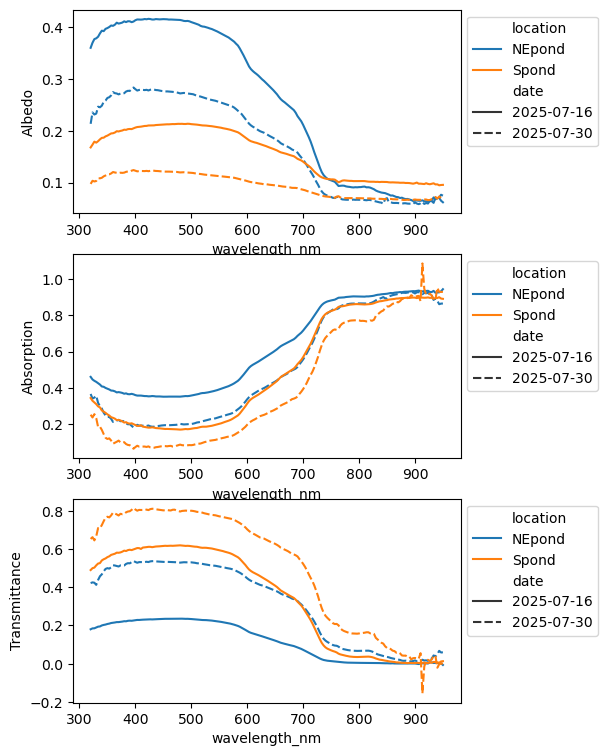

In [29]:
ts_sel = [ts_NE, ts_S, ts_NE_1, ts_S_1]
df_T = df_a1.query('variable == "Transmittance" & timestamp_utc in @ts_sel').reset_index()
df_T['date'] = df_T['timestamp_utc'].dt.strftime('%Y-%m-%d')

ts_sel = [ts_NE_2_A, ts_S_2_A, ts_NE_1_A, ts_S_1_A]
df_A = df_a1.query('variable == "Albedo" & timestamp_utc in @ts_sel').reset_index()
df_A['date'] = df_A['timestamp_utc'].dt.strftime('%Y-%m-%d')

df_temp = pd.concat([
    df_T.drop(columns=['timestamp_utc', 'station', 'azimuth', 'type', 'depth', 'repetition']),
    df_A.drop(columns=['timestamp_utc', 'station', 'azimuth', 'type', 'depth', 'repetition']),
    ]).pivot(index=['date', 'location', 'wavelength_nm'], columns='variable', values='value')
df_temp['Absorption'] = 1 - df_temp['Albedo'] - df_temp['Transmittance']

f, axs = plt.subplots(3, 1, figsize=(5, 9))

sns.lineplot(x='wavelength_nm', y='Albedo', hue='location', style='date', ax=axs[0],
            data=df_temp)
axs[0].set_ylabel('Albedo')
sns.move_legend(axs[0], "upper left", bbox_to_anchor=(1,1))

sns.lineplot(x='wavelength_nm', y='Absorption', hue='location', style='date', ax=axs[1],
            data=df_temp)
axs[1].set_ylabel('Absorption')
sns.move_legend(axs[1], "upper left", bbox_to_anchor=(1,1))


sns.lineplot(x='wavelength_nm', y='Transmittance', hue='location', style='date', ax=axs[2],
            data=df_temp)
axs[2].set_ylabel('Transmittance')
sns.move_legend(axs[2], "upper left", bbox_to_anchor=(1,1))


In [30]:
df_temp = pd.concat([
    df_T.drop(columns=['timestamp_utc', 'station', 'azimuth', 'type', 'depth', 'repetition']),
    df_A.drop(columns=['timestamp_utc', 'station', 'azimuth', 'type', 'depth', 'repetition']),
    ]).pivot(index=['date', 'location', 'wavelength_nm'], columns='variable', values='value')
df_temp['Absorption'] = 1 - df_temp['Albedo'] - df_temp['Transmittance']


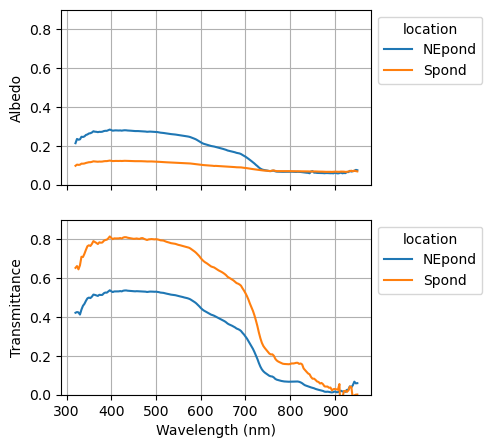

In [36]:
ts_sel = [ts_NE, ts_S]
df_T = df_a1.query('variable == "Transmittance" & timestamp_utc in @ts_sel').reset_index()
df_T['date'] = df_T['timestamp_utc'].dt.strftime('%Y-%m-%d')

ts_sel = [ts_NE_2_A, ts_S_2_A]
df_A = df_a1.query('variable == "Albedo" & timestamp_utc in @ts_sel').reset_index()
df_A['date'] = df_A['timestamp_utc'].dt.strftime('%Y-%m-%d')

df_temp = pd.concat([
    df_T.drop(columns=['timestamp_utc', 'station', 'azimuth', 'type', 'depth', 'repetition']),
    df_A.drop(columns=['timestamp_utc', 'station', 'azimuth', 'type', 'depth', 'repetition']),
    ]).pivot(index=['date', 'location', 'wavelength_nm'], columns='variable', values='value')

f, axs = plt.subplots(2, 1, sharex=True, figsize=(4, 5))

sns.lineplot(x='wavelength_nm', y='Albedo', hue='location', ax=axs[0],
            data=df_temp)
axs[0].set_ylabel('Albedo')
axs[0].grid()
axs[0].set_ylim([0, 0.9])
sns.move_legend(axs[0], "upper left", bbox_to_anchor=(1,1))

sns.lineplot(x='wavelength_nm', y='Transmittance', hue='location', ax=axs[1],
            data=df_temp)
axs[1].set_ylabel('Transmittance')
axs[1].grid()
axs[1].set_ylim([0, 0.9])
sns.move_legend(axs[1], "upper left", bbox_to_anchor=(1,1))
axs[1].set_xlabel('Wavelength (nm)')

f.savefig(os.path.join('..', 'figures', 'r2b_nepond_spond.png'),
         dpi=300, bbox_inches='tight')

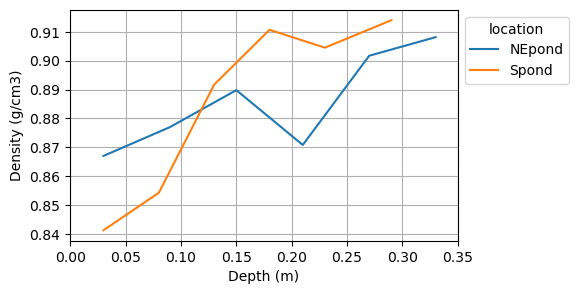

In [44]:
f, ax = plt.subplots(1, 1, figsize=(5, 3))

sns.lineplot(x='depth', y='density', hue='location', ax=ax, data=df_dens.query('location in ["NEpond", "Spond"]'))
ax.set_xlabel('Depth (m)')
ax.set_xlim([0, 0.35])
ax.set_ylabel('Density (g/cm3)')
ax.grid()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))

f.savefig(os.path.join('..', 'figures', 'density_NE_S_ponds.png'),
         dpi=300, bbox_inches='tight')

In [37]:
df_dens

,depth,density,location
0,0.03,0.867031,NEpond
1,0.09,0.877001,NEpond
2,0.15,0.889802,NEpond
3,0.21,0.870828,NEpond
4,0.27,0.901709,NEpond
5,0.33,0.908146,NEpond
0,0.03,0.841298,Spond
1,0.08,0.854275,Spond
2,0.13,0.891733,Spond
3,0.18,0.910704,Spond
